In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import datetime

In [11]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [12]:
dt=pd.read_csv(r"C:\Users\subha\Desktop\Untitled Folder 3\US_Accidents_March23.csv")

In [13]:
dt

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [14]:
dt.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [16]:
print(dt.head())
print(dt.info())
print(dt.describe())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [17]:
# Handle missing values (example: replace NaNs with 'Unknown' for categorical and 0 for numerical)
dt['Weather_Condition'].fillna('Unknown', inplace=True)
dt['Temperature(F)'].fillna(0, inplace=True)
dt['Wind_Speed(mph)'].fillna(0, inplace=True)
dt['Precipitation(in)'].fillna(0, inplace=True)


In [22]:
# Inspect the problematic Start_Time data
problematic_rows = dt['Start_Time'][dt['Start_Time'].str.contains('\.')]
print("Problematic Start_Time rows:", problematic_rows.head(10))

Problematic Start_Time rows: 3639775    2017-07-23 04:21:01.000000000
3639776    2017-07-23 05:18:46.000000000
3639777    2017-07-23 05:36:01.000000000
3639778    2017-07-23 08:36:01.000000000
3639779    2017-07-23 11:02:16.000000000
3639780    2017-07-23 13:26:16.000000000
3639781    2017-07-23 13:37:31.000000000
3639782    2017-07-23 13:37:31.000000000
3639783    2017-07-23 13:46:31.000000000
3639784    2017-07-23 14:19:32.000000000
Name: Start_Time, dtype: object


In [23]:
# Clean Start_Time by removing trailing fractional seconds
dt['Start_Time'] = dt['Start_Time'].str.split('.').str[0]

# Convert 'Start_Time' to datetime
dt['Start_Time'] = pd.to_datetime(dt['Start_Time'], errors='coerce')

# Extract hour from 'Start_Time'
dt['Hour'] = dt['Start_Time'].dt.hour

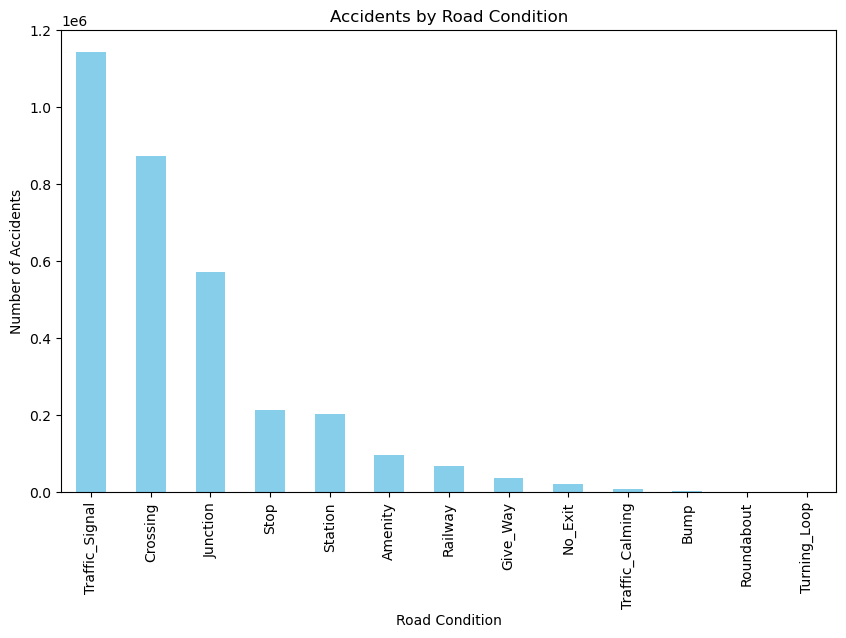

In [24]:
# Analysis of Road Conditions and Accidents
road_conditions = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']
road_conditions_df = dt[road_conditions].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
road_conditions_df.plot(kind='bar', color='skyblue')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Road Condition')
plt.show()

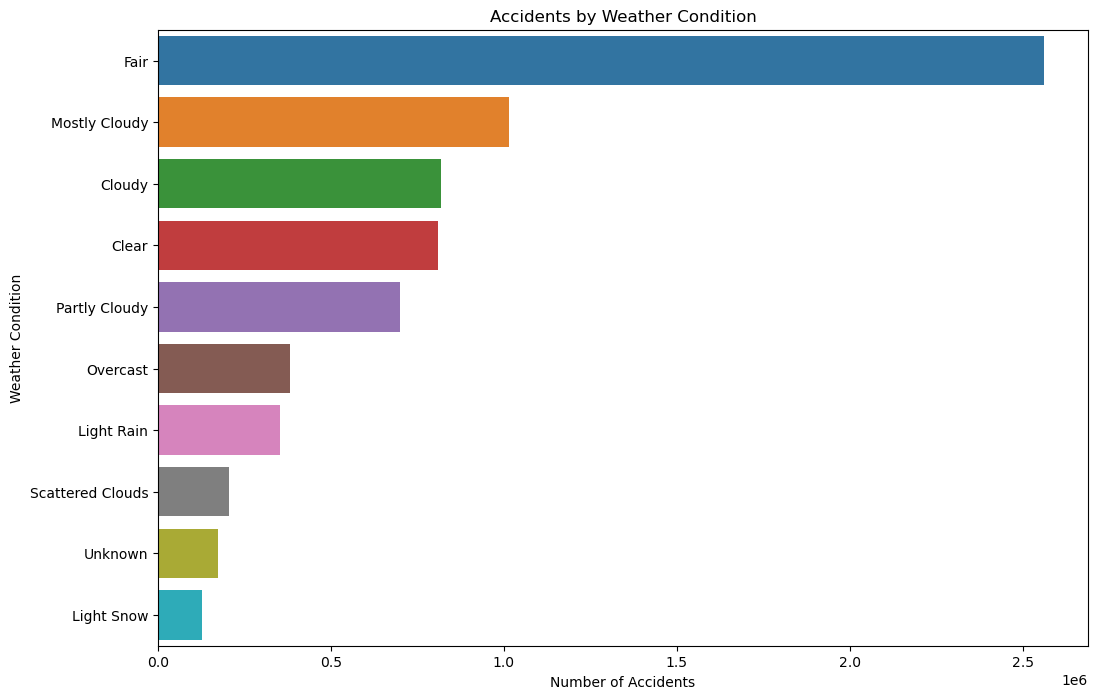

In [26]:
# Analysis of Weather Conditions and Accidents
plt.figure(figsize=(12, 8))
sns.countplot(y='Weather_Condition', data=dt, order=dt['Weather_Condition'].value_counts().index[:10])
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.title('Accidents by Weather Condition')
plt.show()

c:\Users\subha\OneDrive\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


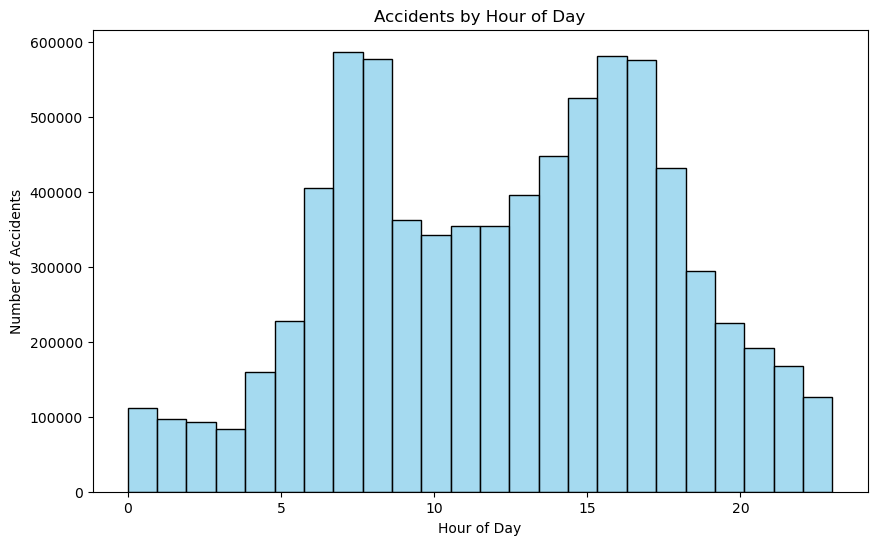

In [27]:
# Analysis of Time of Day and Accidents
plt.figure(figsize=(10, 6))
sns.histplot(dt['Hour'], bins=24, kde=False, color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Hour of Day')
plt.show()

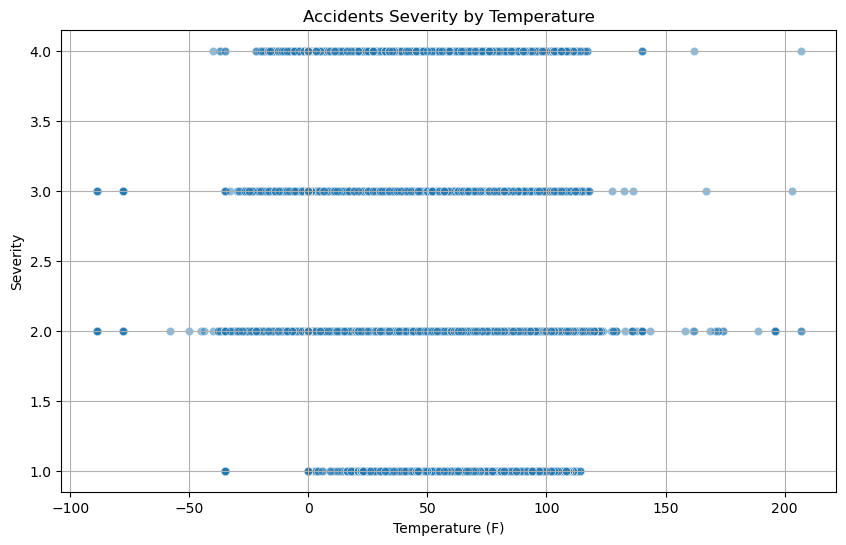

Scatter plot of accidents severity by temperature saved as accidents_severity_temperature.png


In [33]:
# 2. Analyzing Contributing Factors with Scatter Plots
# Example: Scatter plot of Temperature vs. Severity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(F)', y='Severity', data=dt, alpha=0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Severity')
plt.title('Accidents Severity by Temperature')
plt.grid(True)
plt.savefig('accidents_severity_temperature.png')
plt.show()
print("Scatter plot of accidents severity by temperature saved as accidents_severity_temperature.png")

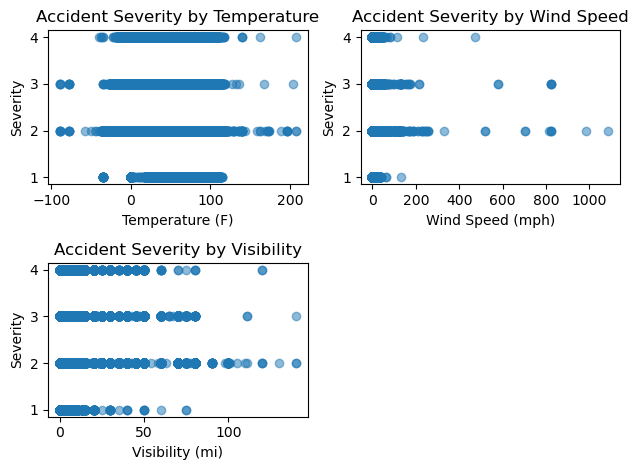

In [35]:

# Scatter plot 1: Severity vs. Temperature
plt.subplot(221)
plt.scatter(dt['Temperature(F)'], dt['Severity'], alpha=0.5)
plt.xlabel('Temperature (F)')
plt.ylabel('Severity')
plt.title('Accident Severity by Temperature')

# Scatter plot 2: Severity vs. Wind Speed
plt.subplot(222)
plt.scatter(dt['Wind_Speed(mph)'], dt['Severity'], alpha=0.5)
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Severity')
plt.title('Accident Severity by Wind Speed')

# Scatter plot 3: Severity vs. Visibility
plt.subplot(223)
plt.scatter(dt['Visibility(mi)'], dt['Severity'], alpha=0.5)
plt.xlabel('Visibility (mi)')
plt.ylabel('Severity')
plt.title('Accident Severity by Visibility')

# Adjust layout to prevent overlapping titles
plt.tight_layout()

# Show the plot
plt.show()